In [1]:
from pauls_functions_advanced import *
import pandas as pd
from sklearn.model_selection import train_test_split
from interpretableai import iai
from sklearn.metrics import accuracy_score

In [ ]:
    # ## Create artificial data set with
    # n = 2000
    # x1 = np.random.normal(loc = 0,scale=1, size=n)
    # x2 = np.random.normal(loc=0, scale=1, size=n)
    # x3 = np.random.normal(loc=0, scale=1, size=n)
    # x4 = np.random.normal(loc=0, scale=1, size=n)
    # x5 = np.random.normal(loc = 0,scale=1, size=n)
    # x6 = np.random.normal(loc=0, scale=1, size=n)
    # x7 = np.random.normal(loc=0, scale=1, size=n)
    # x8 = np.random.normal(loc=0, scale=1, size=n)
    # x9 = np.random.normal(loc=0, scale=1, size=n)
    # x10 = np.random.normal(loc=0, scale=1, size=n)

    # label_not_flipped = np.random.choice([1,0], replace = True, size = n, p = [0.9, 0.1])

    # rule_1 = ((x1 > -0.4).astype(float) * (x2 <  0.7).astype(float) * (x3 <  1.5).astype(float)* (x4 > -0.6).astype(float) )*label_not_flipped

    # logistic_function = np.exp(rule_1 + 0.15*x3 + 0.)
    # y = ((x1 > -0.4).astype(float) * (x2 <  0.7).astype(float) * (x3 <  1.5).astype(float)* (x4 > -0.6).astype(float) )*label_not_flipped
    # y_bar = ((x1 > -0.4).astype(float) * (x2 <  0.7).astype(float) * (x3 <  1.5).astype(float)* (x4 > -0.6).astype(float) )

    # simulated_data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'y': y, 'y_bar': y_bar})

In [ ]:
# accuracies = pd.DataFrame(np.zeros((20, 3)))
# accuracies.columns = ['OCT', "True Model", 'CART']

iters = 10

accuracies = {i: {} for i in range(iters)}

for i in range(iters):

    ## Create artificial data set with
    n = 2000
    x1 = np.random.normal(loc = 0,scale=1, size=n)
    x2 = np.random.normal(loc=0, scale=1, size=n)
    x3 = np.random.normal(loc=0, scale=1, size=n)
    x4 = np.random.normal(loc=0, scale=1, size=n)
    x5 = np.random.normal(loc = 0,scale=1, size=n)
    x6 = np.random.normal(loc=0, scale=1, size=n)
    x7 = np.random.normal(loc=0, scale=1, size=n)
    x8 = np.random.normal(loc=0, scale=1, size=n)

    label_not_flipped = np.random.choice([1,0], replace = True, size = n, p = [0.9, 0.1])

    y = np.exp(0.3*x1 + ((x1 > -0.4).astype(float) * (x2 <  0.7).astype(float) * (x3 <  1.5).astype(float)* (x4 > -0.6).astype(float) )*label_not_flipped)
    y_bar = np.exp(0.3*x1 + ((x1 > -0.4).astype(float) * (x2 <  0.7).astype(float) * (x3 <  1.5).astype(float)* (x4 > -0.6).astype(float) ))

    simulated_data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 
                                    'x5': x1, 'x6': x2, 'x7': x3, 'x4': x4,
                                    'y': y, 'y_bar': y_bar})

    features = simulated_data[['x1', 'x2', 'x3', 'x4']]
    diagnosis = simulated_data['y']
    orig_cols = simulated_data.columns

    X_train, X_test, y_train, y_test = train_test_split(features, diagnosis, test_size = 0.2, random_state=i)

    OCT = iai.OptimalTreeClassifier(max_depth = 4, cp = 0)
    OCT.fit(X_train, y_train)

    CART = iai.OptimalTreeClassifier(max_depth = 4, criterion = 'gini', localsearch = False, cp = 0)
    CART.fit(X_train, y_train)

    accuracy_OCT = accuracy_score(OCT.predict(X_test), y_test)
    accuracy_true = accuracy_score(simulated_data.loc[y_test.index]['y_bar'].values,y_test.values)
    accuracy_CART = accuracy_score(CART.predict(X_test),y_test.values)

    accuracies[i]['OCT'] = accuracy_OCT
    accuracies[i]['True Model'] = accuracy_true
    accuracies[i]['CART'] = accuracy_CART

<AxesSubplot: >

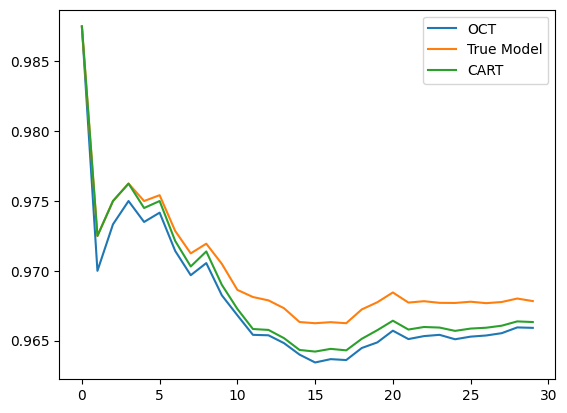

In [ ]:
pd.DataFrame(accuracies).T.expanding().mean().plot()